In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
train_data_dir = r'C:\Users\ASUS VivoBook\Downloads\apple'

# Set up the training data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

# Set up the validation data generator
validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')


Found 2537 images belonging to 4 classes.
Found 634 images belonging to 4 classes.


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/20
79/79 [==============================] - 201s 3s/step - loss: 0.6812 - accuracy: 0.7337 - val_loss: 0.7224 - val_accuracy: 0.7648
Epoch 2/20
79/79 [==============================] - 201s 3s/step - loss: 0.3266 - accuracy: 0.8770 - val_loss: 0.3305 - val_accuracy: 0.9013
Epoch 3/20
79/79 [==============================] - 197s 2s/step - loss: 0.1958 - accuracy: 0.9269 - val_loss: 0.2334 - val_accuracy: 0.9128
Epoch 4/20
79/79 [==============================] - 197s 2s/step - loss: 0.1605 - accuracy: 0.9377 - val_loss: 0.1907 - val_accuracy: 0.9424
Epoch 5/20
79/79 [==============================] - 200s 3s/step - loss: 0.1231 - accuracy: 0.9529 - val_loss: 0.2424 - val_accuracy: 0.9211
Epoch 6/20
79/79 [==============================] - 202s 3s/step - loss: 0.0834 - accuracy: 0.9713 - val_loss: 0.2465 - val_accuracy: 0.9243
Epoch 7/20
79/79 [==============================] - 203s 3s/step - loss: 0.0988 - accuracy: 0.9633 - val_loss: 0.3879 - val_accuracy: 0.9030
Epoch 8/20
79

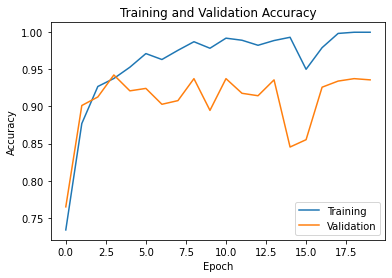

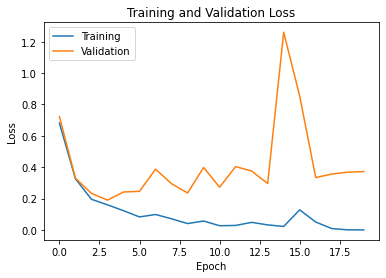

In [4]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()


In [5]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
test_image_path = r'C:\Users\ASUS VivoBook\Downloads\apple\Symptoms-of-Apple-Scab-on-the-Foliage.jpg'
img = image.load_img(test_image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make the prediction
predictions = model.predict(x)
class_labels = train_generator.class_indices
predicted_class = list(class_labels.keys())[np.argmax(predictions)]

print('Predicted class:', predicted_class)


1/1 [==============================] - 0s 291ms/step
Predicted class: Apple___Cedar_apple_rust
